In [150]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [151]:
#uploading text data
data = pd.read_csv("SMSSpamCollection", sep ='\t',names=["label", "message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [152]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [153]:
duplicatedRow = data[data.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [154]:
data.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [155]:
# Get all the ham and spam messages
ham_msg = data[data.label =='ham']
spam_msg = data[data.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

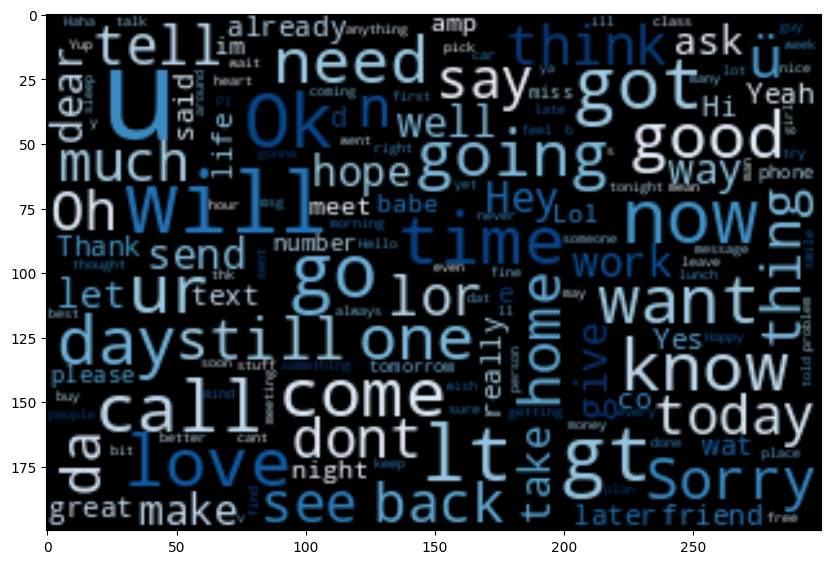

In [156]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =300, height =200, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(10,7))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.show()

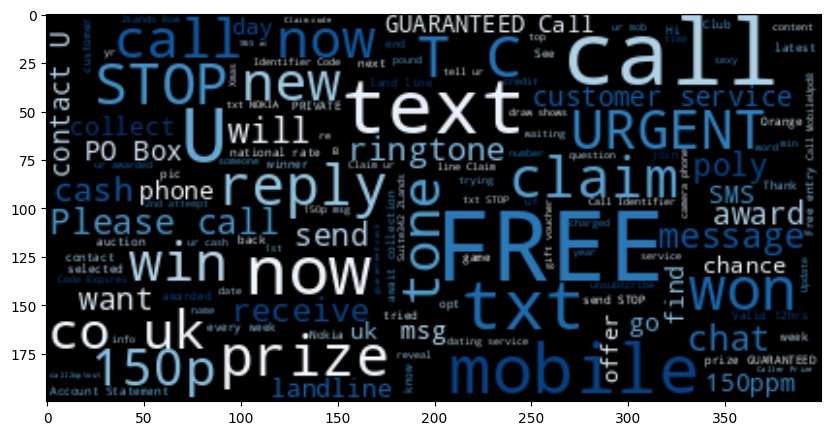

In [157]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =400, height =200, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(10,7))
plt.imshow(spam_msg_cloud, interpolation='bilinear')

plt.show()


15.481865284974095

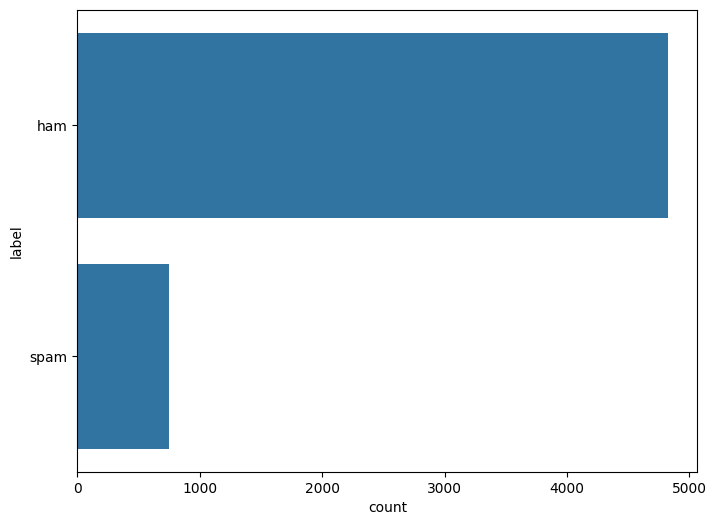

In [158]:
# Check if there is any imbalance in data
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100

In [159]:
#  downsample to fix class imbalance
ham_msg_df = ham_msg.sample(n=len(spam_msg), random_state=44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


<ipython-input-160-d1fbf7993332>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)


Text(0.5, 0, 'Message types')

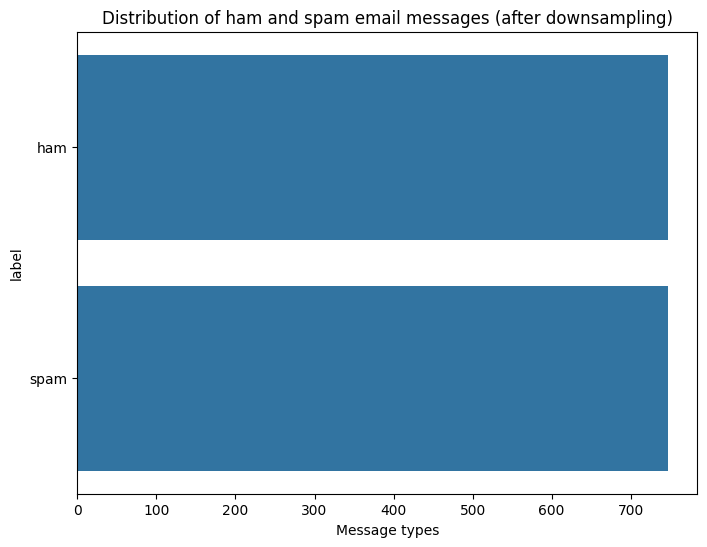

In [160]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')


In [161]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [162]:
# Defining pre-processing hyperparameters
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

In [163]:
#Tokenizing
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [164]:
# Get the word_index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [165]:
#check how many words
total_words = len(word_index)
print('There are %s unique tokens in training data. ' % total_words)

There are 4169 unique tokens in training data. 


In [166]:
# Sequencing and padding on training and testing
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [167]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [168]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(27, 24)

In [169]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [170]:
vocab_size = 500
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [171]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid')) #binary classification

In [172]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_5  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 24)                408       
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [173]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [174]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 5s - loss: 0.6900 - accuracy: 0.7230 - val_loss: 0.6859 - val_accuracy: 0.8428 - 5s/epoch - 120ms/step
Epoch 2/30
38/38 - 2s - loss: 0.6773 - accuracy: 0.8510 - val_loss: 0.6659 - val_accuracy: 0.8462 - 2s/epoch - 45ms/step
Epoch 3/30
38/38 - 1s - loss: 0.6429 - accuracy: 0.8787 - val_loss: 0.6180 - val_accuracy: 0.8495 - 1s/epoch - 33ms/step
Epoch 4/30
38/38 - 1s - loss: 0.5756 - accuracy: 0.8837 - val_loss: 0.5388 - val_accuracy: 0.8528 - 873ms/epoch - 23ms/step
Epoch 5/30
38/38 - 1s - loss: 0.4811 - accuracy: 0.8879 - val_loss: 0.4521 - val_accuracy: 0.8629 - 521ms/epoch - 14ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3915 - accuracy: 0.9021 - val_loss: 0.3705 - val_accuracy: 0.8863 - 444ms/epoch - 12ms/step
Epoch 7/30
38/38 - 0s - loss: 0.3094 - accuracy: 0.9138 - val_loss: 0.3055 - val_accuracy: 0.8930 - 341ms/epoch - 9ms/step
Epoch 8/30
38/38 - 1s - loss: 0.2492 - accuracy: 0.9297 - val_loss: 0.2659 - val_accuracy: 0.8997 - 671ms/epoch - 18ms/step
Epoch 9/30
38/38 

In [175]:
# Model performance on test data
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9431


[0.1261693835258484, 0.9431437849998474]

In [176]:
# Read as a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

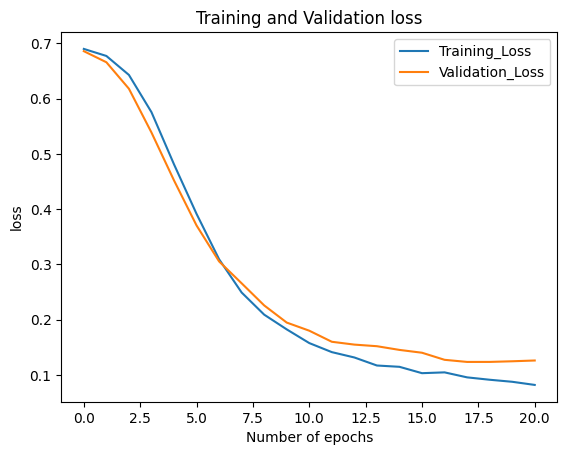

In [177]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

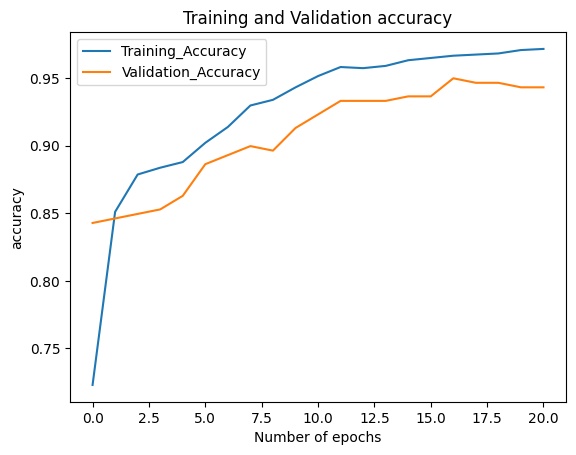

In [178]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')